In [7]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
thesis_dir = '/home/azstephe/liverRegression/regression_liver/data/figs/'

colors = {
        'Rat': '#89b697',      
        'Macaque': '#89a1b6',
        'Cow': '#d1c177',      
        'Pig': '#d59698',
        'Mouse': '#a78dc7',
        'Neg': '#a3a3a3'
}

super_super_lights = {
    'Rat': '#d9ecea',
    'Macaque': '#d5dde7',
    'Cow': '#f2ecd0',
    'Pig': '#f5d6d7',
    'Mouse': '#e2d8f0',
    'Neg': '#e0e0e0'
}

super_lights = {
    'Rat': '#cce4e0',
    'Macaque': '#c6d2de',
    'Cow': '#e8e0bb',
    'Pig': '#ebc5c7',
    'Mouse': '#d7cdea',
    'Neg': '#d1d1d1'

}

darks = {
        'Rat': '#7ea7a2',      
        'Macaque': '#74899b',
        'Cow': '#bfb164',      
        'Pig': '#b67076',
        'Mouse': '#8669a7',
        'Neg': '#8e8e8e'
}

lights = {
        'Rat': '#add0b0',      
        'Macaque': '#9eb9d1',
        'Cow': '#e3d289',      
        'Pig': '#f4b9bb',
        'Mouse': '#c6b3df',
        'Neg': '#b6b6b6'
}

super_darks = {
    'Rat': '#2e4946',       # dark teal
    'Macaque': '#2a3a46',   # dark slate blue
    'Cow': '#4d471f',       # dark olive
    'Pig': '#472d2f',       # dark rose
    'Mouse': '#5f4a77',      # dark gray
    'Neg': '#353535'      # dark gray
}

def histogram(pred_df, name, status):
    species = status.split(' ')[-1]
    plt.hist(pred_df, bins=50, color=colors[species])
    plt.xlim(0,4.1)
    plt.ylim(0, 1)
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {status}')
    # plt.savefig(f"{thesis_dir}{direc}{status.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

table = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables_mse/135log_model_eval_table_FINAL_mse.tsv', sep='\t')
mouseTable = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables_mse/mouse_135log_model_eval_table_FINAL_mse.tsv', sep='\t')

def locate(tab, species, group, metric, model):
    num_series = tab.loc[(tab['species'] == species) &
                         (tab['Group'] == group) &
                         (tab['Metric'] == metric)][model]
    
    # Use .item() to extract the single scalar value
    return num_series.item()

def correlations(tab, species, group, model):
    pearson_r = locate(tab, species, group, 'Pearson', model),
    pearson_p = locate(tab, species, group, 'Pearson_p', model),
    spearman_rho = locate(tab, species, group, 'Spearman', model),
    spearman_p = locate(tab, species, group, 'Spearman_p', model),

    return float(pearson_r[0]), float(pearson_p[0]), float(spearman_rho[0]), float(spearman_p[0])

def corr(true_df, pred_df):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
    # print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-test: {pearson_p_test:.4g}")
    
    spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)
    # print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-test: {spearman_p_test:.4g}")
    return float(pearson_corr), float(pearson_p_test), float(spearman_corr), float(spearman_p_test)

def mean_squared_error(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    return np.mean((x - y) ** 2)

In [3]:
# old way but mse slightly different from eval_FINAL??? DON'T RUN THIS CELL this is for reference
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap, to_rgb

direc='test_scatter_9_25/'

def format_pval(p):
    return "0.0" if p == 0 else f"{p:.2e}"
    
def mean_squared_error(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    return np.mean((x - y) ** 2)

def format_value(metric_name, value):
    """Format values depending on whether it's a P-value metric or not."""
    # Check for '_p' which is more general for 'pearson_p', 'spearman_p' etc.
    if "_p" in metric_name:
        return f"{value:.2e}"  # Scientific notation for p-values
    else:
        return f"{value:.3g}"  # General format for other metrics
    
def make_smooth_colormap(name, colors_hex, n_points=256):
    colors_rgb = [to_rgb(c) for c in colors_hex]
    return LinearSegmentedColormap.from_list(name, colors_rgb, N=n_points)
    
def make_triple_colormap(base_hex, name):
    if name == 'Cow_triple':
        return make_smooth_colormap('Cow_contrast', [lights['Cow'], '#e07014', '#db3218', '#db0f6b'])
    elif name == 'Mouse_triple':
        return make_smooth_colormap('Mouse_contrast', [lights['Mouse'], '#4E3987', '#0055C2', '#09C3E8'])
    elif name == 'Pig_triple':
        return make_smooth_colormap('Pig_contrast', [lights['Pig'], '#9E494C', '#A61FA1', '#5613A8'])
    elif name == 'Macaque_triple':
        return make_smooth_colormap('Macaque_contrast', [lights['Macaque'], '#348394', '#1CC7B5', '#08C747'])
    elif name == 'Rat_triple':
        return make_smooth_colormap('Rat_contrast', [lights['Rat'], '#3F7028', '#D6C215', '#FF9E17'])
    else:
        return make_smooth_colormap(name + '_contrast', ['#ffffcc', base_hex, '#3b528b'])

triple_cmaps = {name: make_triple_colormap(hex_color, name + '_triple')
                for name, hex_color in colors.items()}

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rP, rho, rhoP, mse, species):
    x = true_df.squeeze()
    y = pred_df.squeeze()

    gridsize=50
    
    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='black', linestyle='--', linewidth=1, dashes=(10, 10))

    custom_cmap = triple_cmaps[species.capitalize()]
        
    hb = plt.hexbin(x, y, gridsize=gridsize, cmap=custom_cmap, mincnt=1)  # higher gridsize = finer bins
    cb = plt.colorbar(hb)

    # Set colorbar ticks to integers only
    cb.locator = ticker.MaxNLocator(integer=True)
    cb.update_ticks()

    cb.ax.tick_params(labelsize=18)

    plt.xlabel(f'{xlabel}', fontsize=22, labelpad=5)
    plt.ylabel(f'{ylabel}', fontsize=22, labelpad=5)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    x = true_df.squeeze().values.reshape(-1, 1)
    y = pred_df.squeeze().values

    # Fit linear regression
    reg = LinearRegression().fit(x, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    reg_line = reg.predict(x)
    
    plt.plot(x, reg_line, color='#57320A', linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}\nmse = {mse:.2f}'
    plt.text(0.03, 0.97, textstr, transform=plt.gca().transAxes,
             fontsize=22, verticalalignment='top')
    textstr = f'm = {slope:.2f}'
    plt.text(0.03, 0.7, textstr, transform=plt.gca().transAxes,
             fontsize=22, verticalalignment='top', color='#57320A')

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.tick_params(width=0.5, length=4)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    
    # --- Add these lines to change tick length ---
    # Customize major ticks
    ax.tick_params(which='major', length=10, width=2)
    # Customize minor ticks
    ax.tick_params(which='minor', length=5, width=1)

    plt.tight_layout()

    # plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}_density_{str(gridsize)}.tif", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()
    return slope

results_corr = []
# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['cow']

model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
# model_list = ['bdbi7l3n']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        mhc = 200
        if model == 'kf8188qf':
            mhc = 100
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_FINAL/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_FINAL/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        
        test2R, test2RP, test2Rho, test2RhoP = correlations(pred_test2_df, doubled_test2_df, 'test2')
        
        test3R, test3RP, test3Rho, test3RhoP = correlations(pred_test3_df, doubled_test3_df, 'test3')
        
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
        test2Mse = mean_squared_error(doubled_test2_df, pred_test2_df)
        test3Mse = mean_squared_error(doubled_test3_df, pred_test3_df)
        orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)

        slope2 = scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for Test2 ({model})', 'Real', 'Predicted', test2R, test2RP, test2Rho, test2RhoP, test2Mse, species)
        slope3 = scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for Test3 ({model})', 'Real', 'Predicted', test3R, test3RP, test3Rho, test3RhoP, test3Mse, species)
        slopeOrtho = scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho, orthoRhoP, orthoMse, species)

        
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test2',
            'pearson_r': test2R,
            'pearson_p': test2RP * mhc,
            'spearman_rho': test2Rho,
            'spearman_p': test2RhoP * mhc,
            'mse': test2Mse,
            'slope': slope2
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test3',
            'pearson_r': test3R,
            'pearson_p': test3RP * mhc,
            'spearman_rho': test3Rho,
            'spearman_p': test3RhoP * mhc,
            'mse': test3Mse,
            'slope': slope3
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'orthologs',
            'pearson_r': orthoR,
            'pearson_p': orthoRP * mhc,
            'spearman_rho': orthoRho,
            'spearman_p': orthoRhoP * mhc,
            'mse': orthoMse,
            'slope': slopeOrtho
        })


species = 'mouse'
for model in model_list:
    mhc = 200
    if model == 'kf8188qf':
        mhc = 100
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_FINAL/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR3: precdictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)

    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test')
    orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)

    slopeOrtho = scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho,orthoRhoP, orthoMse, species)
    
    results_corr.append({
            'species': species,
            'model': model,
            'set': 'orthologs',
            'pearson_r': orthoR,
            'pearson_p': orthoRP * mhc,
            'spearman_rho': orthoRho,
            'spearman_p': orthoRhoP * mhc,
            'mse': orthoMse,
            'slope': slopeOrtho
        })


results_corr_df = pd.DataFrame(results_corr)

df = results_corr_df
id_vars = ['species', 'model', 'set']
metric_vars = ['pearson_r', 'pearson_p', 'spearman_rho', 'spearman_p', 'mse', 'slope']

df_long = df.melt(
    id_vars=id_vars,
    value_vars=metric_vars,
    var_name='metric',
    value_name='value'
)

# 3. Pivot the long DataFrame to get models as columns
# The index levels will be species, set, and then the metric name
final_df = df_long.pivot_table(
    index=['species', 'set', 'metric'],
    columns='model',
    values='value'
)

# Optional: To ensure the metrics are in the original order,
# you can set the 'metric' column as a categorical type.
final_df = final_df.reindex(metric_vars, level='metric')
final_df_display = final_df.copy()

def format_value(metric_name, value):
    """Format values depending on whether it's a P-value metric or not."""
    # Check for '_p' which is more general for 'pearson_p', 'spearman_p' etc.
    if "_p" in metric_name:
        return f"{value:.2e}"  # Scientific notation for p-values
    else:
        return f"{value:.3g}"  # General format for other metrics

# Loop through each model's column to apply the formatting
for col in final_df_display.columns:
    final_df_display[col] = final_df_display.apply(
        # Access the 'metric' from the index using row.name[2]
        # (assuming it's the 3rd level of your index)
        lambda row: format_value(row.name[2], row[col]),
        axis=1
    )

# Display the formatted table
# final_df_display


cow

bdbi7l3n


TypeError: correlations() missing 1 required positional argument: 'model'

In [4]:
# test log scatter
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap, to_rgb

direc='test_scatter_9_25/'

def format_pval(p):
    return "0.0" if p == 0 else f"{p:.2e}"
    
def mean_squared_error(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    return np.mean((x - y) ** 2)

def format_value(metric_name, value):
    """Format values depending on whether it's a P-value metric or not."""
    # Check for '_p' which is more general for 'pearson_p', 'spearman_p' etc.
    if "_p" in metric_name:
        return f"{value:.2e}"  # Scientific notation for p-values
    else:
        return f"{value:.3g}"  # General format for other metrics
    
def make_smooth_colormap(name, colors_hex, n_points=256):
    colors_rgb = [to_rgb(c) for c in colors_hex]
    return LinearSegmentedColormap.from_list(name, colors_rgb, N=n_points)
    
def make_triple_colormap(base_hex, name):
    if name == 'Cow_triple':
        return make_smooth_colormap('Cow_contrast', [lights['Cow'], '#e07014', '#db3218', '#db0f6b'])
    elif name == 'Mouse_triple':
        return make_smooth_colormap('Mouse_contrast', [lights['Mouse'], '#4E3987', '#0055C2', '#09C3E8'])
    elif name == 'Pig_triple':
        return make_smooth_colormap('Pig_contrast', [lights['Pig'], '#9E494C', '#A61FA1', '#5613A8'])
    elif name == 'Macaque_triple':
        return make_smooth_colormap('Macaque_contrast', [lights['Macaque'], '#348394', '#1CC7B5', '#08C747'])
    elif name == 'Rat_triple':
        return make_smooth_colormap('Rat_contrast', [lights['Rat'], '#3F7028', '#D6C215', '#FF9E17'])
    else:
        return make_smooth_colormap(name + '_contrast', ['#ffffcc', base_hex, '#3b528b'])

triple_cmaps = {name: make_triple_colormap(hex_color, name + '_triple')
                for name, hex_color in colors.items()}

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rP, rho, rhoP, mse, species):
    x = true_df.squeeze()
    y = pred_df.squeeze()

    gridsize=50
    
    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='black', linestyle='--', linewidth=1, dashes=(10, 10))

    custom_cmap = triple_cmaps[species.capitalize()]
        
    hb = plt.hexbin(x, y, gridsize=gridsize, cmap=custom_cmap, mincnt=1)  # higher gridsize = finer bins
    cb = plt.colorbar(hb)

    # Set colorbar ticks to integers only
    cb.locator = ticker.MaxNLocator(integer=True)
    cb.update_ticks()

    cb.ax.tick_params(labelsize=18)

    plt.xlabel(f'{xlabel}', fontsize=22, labelpad=5)
    plt.ylabel(f'{ylabel}', fontsize=22, labelpad=5)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    x = true_df.squeeze().values.reshape(-1, 1)
    y = pred_df.squeeze().values

    # Fit linear regression
    reg = LinearRegression().fit(x, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    reg_line = reg.predict(x)
    
    plt.plot(x, reg_line, color='#57320A', linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}\nmse = {mse:.2f}'
    plt.text(0.03, 0.97, textstr, transform=plt.gca().transAxes,
             fontsize=22, verticalalignment='top')
    textstr = f'm = {slope:.2f}'
    plt.text(0.03, 0.7, textstr, transform=plt.gca().transAxes,
             fontsize=22, verticalalignment='top', color='#57320A')

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.tick_params(width=0.5, length=4)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    
    # --- Add these lines to change tick length ---
    # Customize major ticks
    ax.tick_params(which='major', length=10, width=2)
    # Customize minor ticks
    ax.tick_params(which='minor', length=5, width=1)

    plt.tight_layout()

    plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}_density_{str(gridsize)}.tif", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()
    return slope
    
table = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables_mse/135log_model_eval_table_FINAL_mse.tsv', sep='\t')
mouseTable = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables_mse/mouse_135log_model_eval_table_FINAL_mse.tsv', sep='\t')
    
results_corr = []
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['cow']
model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
# model_list = ['bdbi7l3n']
for species in species_list:
    # print(f'\n{species}')
    for model in model_list:
        # print(f'\n{model}')
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_FINAL/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_FINAL/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        test2R, test2RP, test2Rho, test2RhoP = correlations(table, species, 'Test2', model)
        
        test3R, test3RP, test3Rho, test3RhoP = correlations(table, species, 'Test3', model)
        
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(table, species, 'Test', model)

        test2Mse = locate(table, species, 'Test2', 'MSE', model)
        test3Mse = locate(table, species, 'Test3', 'MSE', model)
        orthoMse = locate(table, species, 'Test', 'MSE', model)

        slope2 = scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for Test2 ({model})', 'Real', 'Predicted', test2R, test2RP, test2Rho, test2RhoP, test2Mse, species)
        slope3 = scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for Test3 ({model})', 'Real', 'Predicted', test3R, test3RP, test3Rho, test3RhoP, test3Mse, species)
        slopeOrtho = scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho, orthoRhoP, orthoMse, species)       
        
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test2',
            'pearson_r': locate(table, species, 'Test2', 'Pearson', model),
            'pearson_p': locate(table, species, 'Test2', 'Pearson_p', model),
            'spearman_rho': locate(table, species, 'Test2', 'Spearman', model),
            'spearman_p': locate(table, species, 'Test2', 'Spearman_p', model),
            'mse': locate(table, species, 'Test2', 'MSE', model),
            'slope': slope2
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test3',
            'pearson_r': locate(table, species, 'Test3', 'Pearson', model),
            'pearson_p': locate(table, species, 'Test3', 'Pearson_p', model),
            'spearman_rho': locate(table, species, 'Test3', 'Spearman', model),
            'spearman_p': locate(table, species, 'Test3', 'Spearman_p', model),
            'mse': locate(table, species, 'Test3', 'MSE', model),
            'slope': slope3
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'orthologs',
            'pearson_r': locate(table, species, 'Test', 'Pearson', model),
            'pearson_p': locate(table, species, 'Test', 'Pearson_p', model),
            'spearman_rho': locate(table, species, 'Test', 'Spearman', model),
            'spearman_p': locate(table, species, 'Test', 'Spearman_p', model),
            'mse': locate(table, species, 'Test', 'MSE', model),
            'slope': slopeOrtho
        })


species = 'mouse'
for model in model_list:
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_FINAL/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR3: precdictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)

    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(mouseTable, species, 'Test', model)
    orthoMse = locate(mouseTable, species, 'Test', 'MSE', model)

    slopeOrtho = scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho,orthoRhoP, orthoMse, species)
    
    results_corr.append({
            'species': species,
            'model': model,
            'set': 'orthologs',
            'pearson_r': locate(mouseTable, species, 'Test', 'Pearson', model),
            'pearson_p': locate(mouseTable, species, 'Test', 'Pearson_p', model),
            'spearman_rho': locate(mouseTable, species, 'Test', 'Spearman', model),
            'spearman_p': locate(mouseTable, species, 'Test', 'Spearman_p', model),
            'mse': locate(mouseTable, species, 'Test', 'MSE', model),
            'slope': slopeOrtho
        })


results_corr_df = pd.DataFrame(results_corr)

df = results_corr_df
id_vars = ['species', 'model', 'set']
metric_vars = ['pearson_r', 'pearson_p', 'spearman_rho', 'spearman_p', 'mse', 'slope']

df_long = df.melt(
    id_vars=id_vars,
    value_vars=metric_vars,
    var_name='metric',
    value_name='value'
)

# 3. Pivot the long DataFrame to get models as columns
# The index levels will be species, set, and then the metric name
final_df = df_long.pivot_table(
    index=['species', 'set', 'metric'],
    columns='model',
    values='value'
)

# Optional: To ensure the metrics are in the original order,
# you can set the 'metric' column as a categorical type.
final_df = final_df.reindex(metric_vars, level='metric')
final_df_display = final_df.copy()

def format_value(metric_name, value):
    """Format values depending on whether it's a P-value metric or not."""
    # Check for '_p' which is more general for 'pearson_p', 'spearman_p' etc.
    if "_p" in metric_name:
        return f"{value:.2e}"  # Scientific notation for p-values
    else:
        return f"{value:.3g}"  # General format for other metrics

# Loop through each model's column to apply the formatting
for col in final_df_display.columns:
    final_df_display[col] = final_df_display.apply(
        # Access the 'metric' from the index using row.name[2]
        # (assuming it's the 3rd level of your index)
        lambda row: format_value(row.name[2], row[col]),
        axis=1
    )

# Display the formatted table
final_df_display


model                           bdbi7l3n   cq45eb2s   kf8188qf
species set       metric                                      
cow     orthologs pearson_r        0.385      0.475       0.42
                  pearson_p     1.34e-89  2.35e-142  1.58e-108
                  spearman_rho     0.391      0.485      0.432
                  spearman_p    8.86e-93  9.78e-150  4.19e-115
                  mse               2.32       1.26       1.14
...                                  ...        ...        ...
rat     test3     pearson_p     3.38e-47   4.56e-79   1.03e-74
                  spearman_rho     0.309      0.398      0.384
                  spearman_p    1.86e-44   7.61e-77   3.40e-71
                  mse                1.8      0.898      0.884
                  slope            0.206      0.669      0.694

[78 rows x 3 columns]

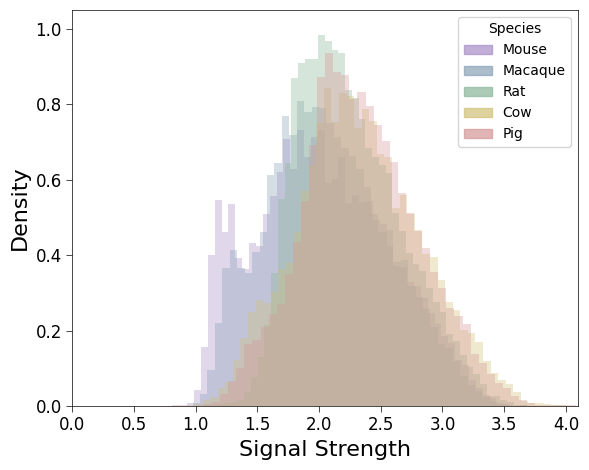

In [6]:
# histogram of logged overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'

files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/log/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/log/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/log/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/log/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.35, label=species, color=colors[species], density=True, edgecolor=None)

plt.xlabel('Signal Strength', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
        # 'Rat': '#94c4be',      
        # 'Macaque': '#89a1b6',
        # 'Cow': '#d1c177',      
        # 'Pig': '#d59698',
        # 'Mouse': '#a78dc7',
legend_handles = [
    Patch(facecolor=colors['Mouse'], edgecolor=colors['Mouse'], label='Mouse', alpha=0.7),
    Patch(facecolor=colors['Macaque'], edgecolor=colors['Macaque'], label='Macaque', alpha=0.7),
    Patch(facecolor=colors['Rat'], edgecolor=colors['Rat'], label='Rat', alpha=0.7),
    Patch(facecolor=colors['Cow'], edgecolor=colors['Cow'], label='Cow', alpha=0.7),
    Patch(facecolor=colors['Pig'], edgecolor=colors['Pig'], label='Pig', alpha=0.7)
]

plt.legend(title="Species", handles=legend_handles)
plt.xlim(0,4.1)
plt.ylim(0, 1.05)
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(width=0.5, length=4)
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}log5_overlay_density.svg", dpi=300, bbox_inches='tight')
plt.show()


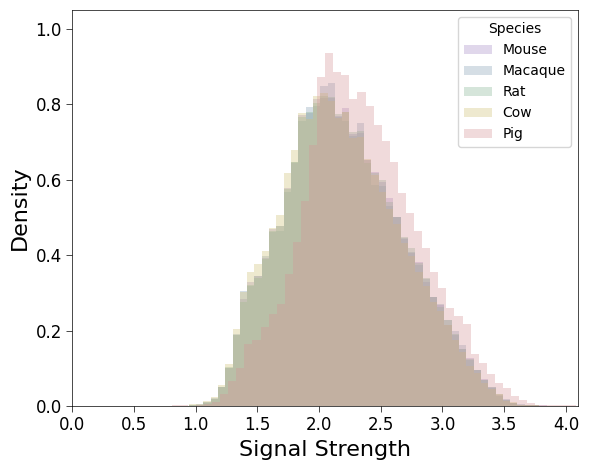

In [7]:
# histogram of eqn overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'
# Define file paths and labels
files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.35, label=species, color=colors[species], density=True, edgecolor=None)

plt.xlabel('Signal Strength', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Species")
plt.xlim(0,4.1)
plt.ylim(0, 1.05)
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(width=0.5, length=4)
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}ladder5_overlay_density.svg", dpi=300, bbox_inches='tight')
plt.show()

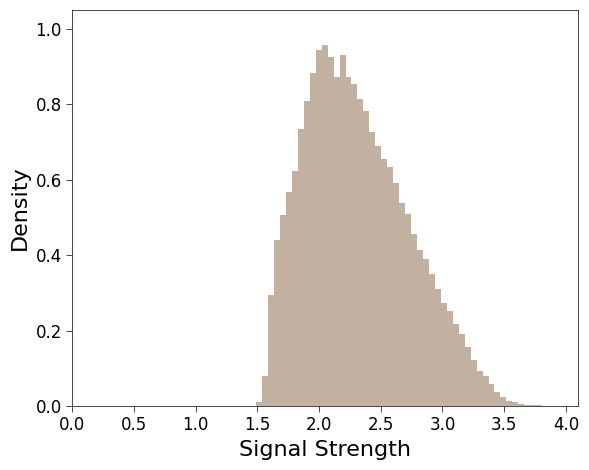

In [10]:
# histogram of qn overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'
# Define file paths and labels
files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/sorted_log_20615/quantile_norm/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.35, label=species, color=colors[species], density=True, edgecolor=None)

plt.xlabel('Signal Strength', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(title="Species")
plt.xlim(0,4.1)
plt.ylim(0, 1.05)
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(width=0.5, length=4)
plt.tight_layout()
plt.savefig(f"{thesis_dir}{direc}qn5_overlay_density.svg", dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# nonmouse negative histograms
from scipy.stats import mannwhitneyu

direc = 'neg_hist_6_13/'

def histogram(pred_df, original_df, name, title, p_val, species, neg_pred_value, mean_pos_value, pos_label='Real for Pos'):
    plt.figure(figsize=(6, 4.8))
    plt.hist(pred_df, bins=50, label='Pred for Neg', alpha=0.5, color=colors['Neg'], density=True)
    plt.hist(original_df, bins=50, label=pos_label, alpha=0.5, color=colors[species.capitalize()], density=True)
    plt.xlim(0,4.1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    for spine in plt.gca().spines.values():
        spine.set_linewidth(0.5)
    ax.tick_params(width=0.5, length=4)
    plt.xlabel(f'{name}', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(x=neg_pred_value, color=super_darks['Neg'], linestyle='-', linewidth=0.3)
    plt.axvline(x=mean_pos_value, color=super_darks[species.capitalize()], linestyle='-', linewidth=0.3)
    print(species)
    print(mean_pos_value)
    plt.legend()
    # plt.savefig(f"{thesis_dir}{direc}{species}_{title.replace(' ', '_')}.svg", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()

def mannwhit(pred_df, original_df, name):
    x = pred_df.squeeze()
    y = original_df.squeeze()
        
    stat, p_value = mannwhitneyu(x, y, alternative='two-sided')
        
        # Interpretation
    alpha = 0.05

    return p_value

results = []
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['macaque']
model_list = ['bdbi7l3n']
for species in species_list:
    for model in model_list:

        original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]
        
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)

        p_val_test1 = mannwhit(pred_test1_df, original_df, 'test1') 


        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred test1 vs real pos test',
            'avg_pred_neg_test1': pred_test1_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_test1
        })
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_neg_df = pred_orthologs_df.tail(neg_len)
        pred_pos_df = pred_orthologs_df.head(pos_len)

        p_val_neg = mannwhit(pred_neg_df, original_df, 'full neg test set')
        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs real pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_neg
        })
        
        p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')
        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs pred pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': pred_pos_df.mean()[0],
            'p_value': p_val_neg_pred
        })
        
        histogram(pred_test1_df, original_df, 'Signal Strength', 'Negative Test1 Vs. True Signal Strength', p_val_test1, species, pred_test1_df.mean()[0], original_df.mean())
        histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0], original_df.mean())
        histogram(pred_neg_df, pred_pos_df, 'Signal Strength', 'Negative Test Set Vs. Positive Test Set Predictions', p_val_neg_pred, species, pred_neg_df.mean()[0], pred_pos_df.mean()[0], 'Pred for Pos')

species = 'mouse'
original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]

pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
neg_len = 2*len(neg_df)
pos_len = 2*len(pos_df)
        
doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
pred_neg_df = pred_df.tail(neg_len)
pred_pos_df = pred_df.head(pos_len)

p_val_neg = mannwhit(pred_neg_df, original_df, 'neg test set')
p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')  

p_val_neg = mannwhit(pred_neg_df, original_df, 'full neg test set')
results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs real pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_neg
        })
        
p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')
results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs pred pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': pred_pos_df.mean()[0],
            'p_value': p_val_neg_pred
        })

histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0], original_df.mean())
histogram(pred_neg_df, pred_pos_df, 'Signal Strength', 'Negative Test Set Vs. Positive Test Set Predictions', p_val_neg_pred, species, pred_neg_df.mean()[0], pred_pos_df.mean()[0], 'Pred for Pos')

results_df = pd.DataFrame(results)

### re-order to make table look nice
comparisons = {
    'pred test1 vs real pos test': 'test1_vs_real_pos',
    'pred neg test vs real pos test': 'neg_vs_real_pos',
    'pred neg test vs pred pos test': 'neg_vs_pred_pos'
}

rows = []

for species, group in results_df.groupby("species"):
    # Neg Mean Pred
    row = {'species': species, 'stat': 'neg mean pred'}
    for comp_orig, comp_clean in comparisons.items():
        if comp_clean == 'test1_vs_real_pos':
            val = group.loc[group['comparison'] == comp_orig, 'avg_pred_neg_test1']
        else:
            val = group.loc[group['comparison'] == comp_orig, 'avg_pred_neg']
        row[comp_clean] = val.values[0] if len(val) else np.nan
    rows.append(row)

    # Pos Mean Pred
    row = {'species': species, 'stat': 'pos mean pred'}
    for comp_orig, comp_clean in comparisons.items():
        val = group.loc[group['comparison'] == comp_orig, 'avg_real_pos']
        row[comp_clean] = val.values[0] if len(val) else np.nan
    rows.append(row)

    # P Value
    row = {'species': species, 'stat': 'p_val'}
    for comp_orig, comp_clean in comparisons.items():
        val = group.loc[group['comparison'] == comp_orig, 'p_value']
        row[comp_clean] = val.values[0] if len(val) else np.nan
    rows.append(row)

# FINAL TABLE
summary_df = pd.DataFrame(rows)
# summary_df.to_csv("/home/azstephe/liverRegression/regression_liver/data/figs/tables/negative_set_histogram_stats.csv", index=False)

macaque
2.064654389379398
macaque
2.064654389379398
macaque
0.9005607590725991
rat
2.2472077650036546
rat
2.2472077650036546
rat
0.9390729578796584
cow
2.3246000851397275
cow
2.3246000851397275
cow
0.9797570492481971
pig
2.33700037726973
pig
2.33700037726973
pig
0.9344510412990168
mouse
2.0243909391695296
mouse
0.9153829330459481


In [5]:
summary_df

,species,stat,test1_vs_real_pos,neg_vs_real_pos,neg_vs_pred_pos
0,cow,neg mean pred,0.592015,0.619083,0.619083
1,cow,pos mean pred,2.324600,2.324600,0.979757
2,cow,p_val,0.000000,0.000000,0.000000
3,macaque,neg mean pred,0.583191,0.603672,0.603672
4,macaque,pos mean pred,2.064654,2.064654,0.900561
5,macaque,p_val,0.000000,0.000000,0.000000
6,mouse,neg mean pred,NaN,0.609156,0.609156
7,mouse,pos mean pred,NaN,2.024391,0.915383
8,mouse,p_val,NaN,0.000000,0.000000
9,pig,neg mean pred,0.598316,0.624624,0.624624


macaque
bdbi7l3n
# of same sign for true difference and predicted difference: 0.5839598997493735 %
Pearson correlation coefficient: 0.2124, p-value: 1.37e-09
Spearman correlation coefficient: 0.2022, p-value: 8.237e-09
0.09837794463340348


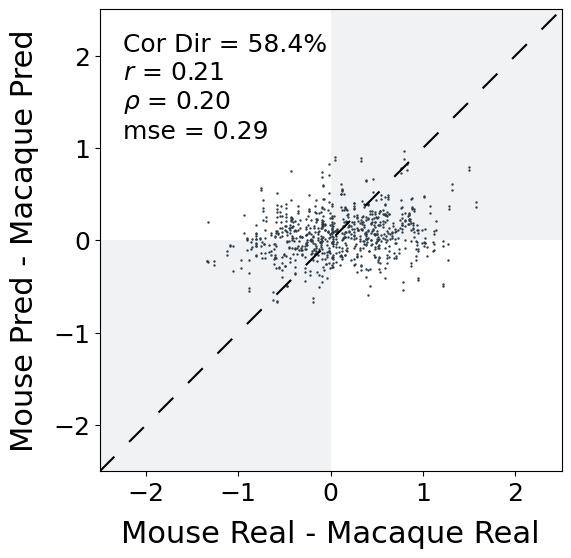

kf8188qf
# of same sign for true difference and predicted difference: 0.581453634085213 %
Pearson correlation coefficient: 0.2413, p-value: 4.931e-12
Spearman correlation coefficient: 0.2305, p-value: 4.41e-11
0.29758586305284274


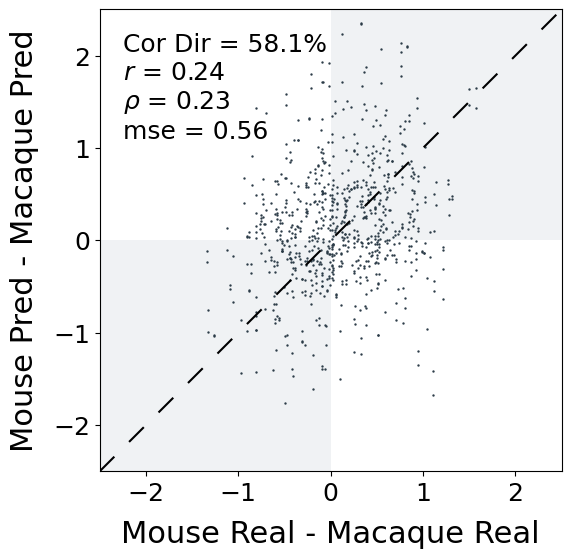

cq45eb2s
# of same sign for true difference and predicted difference: 0.5852130325814536 %
Pearson correlation coefficient: 0.2453, p-value: 2.104e-12
Spearman correlation coefficient: 0.2259, p-value: 1.079e-10
0.28485600032357006


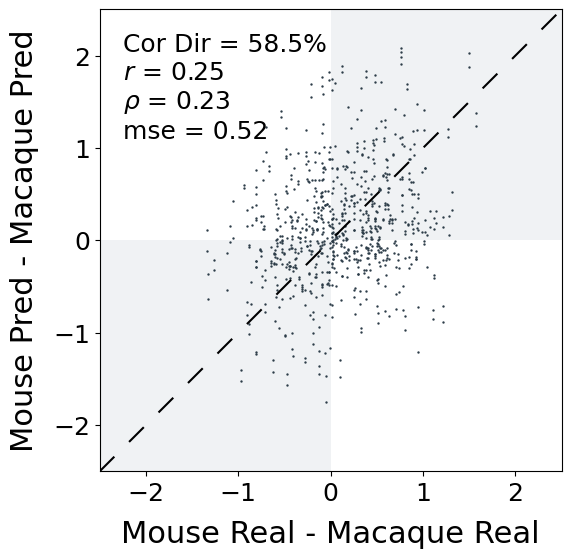

rat
bdbi7l3n
# of same sign for true difference and predicted difference: 0.5486787204450626 %
Pearson correlation coefficient: 0.1773, p-value: 1.264e-11
Spearman correlation coefficient: 0.1527, p-value: 5.891e-09
0.0802115316247848


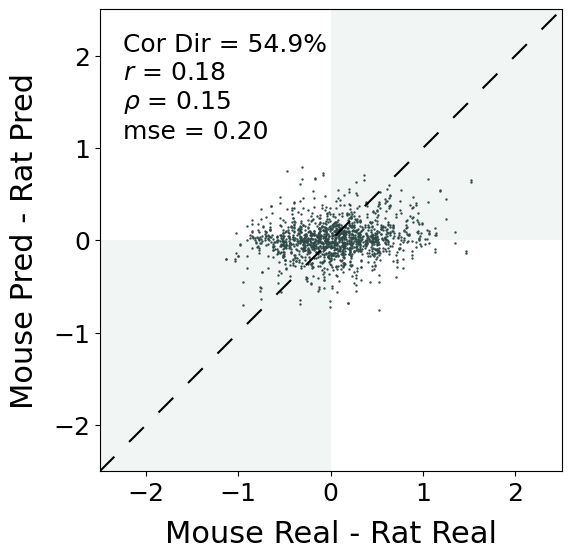

kf8188qf
# of same sign for true difference and predicted difference: 0.5924895688456189 %
Pearson correlation coefficient: 0.2935, p-value: 5.836e-30
Spearman correlation coefficient: 0.2811, p-value: 1.622e-27
0.3672983048764966


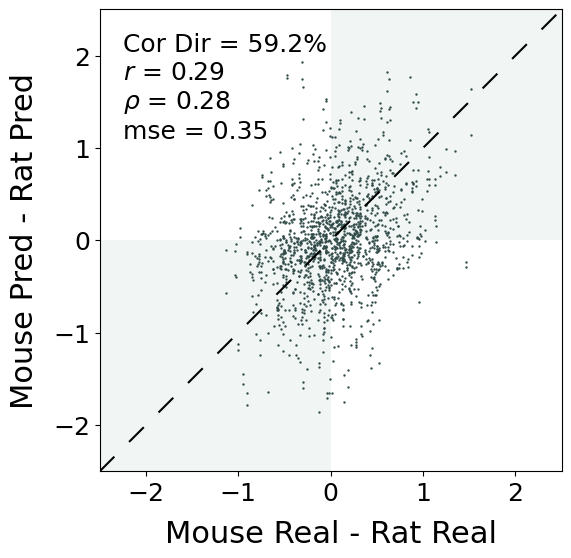

cq45eb2s
# of same sign for true difference and predicted difference: 0.5904033379694019 %
Pearson correlation coefficient: 0.2850, p-value: 2.786e-28
Spearman correlation coefficient: 0.2619, p-value: 5.544e-24
0.3184195563658235


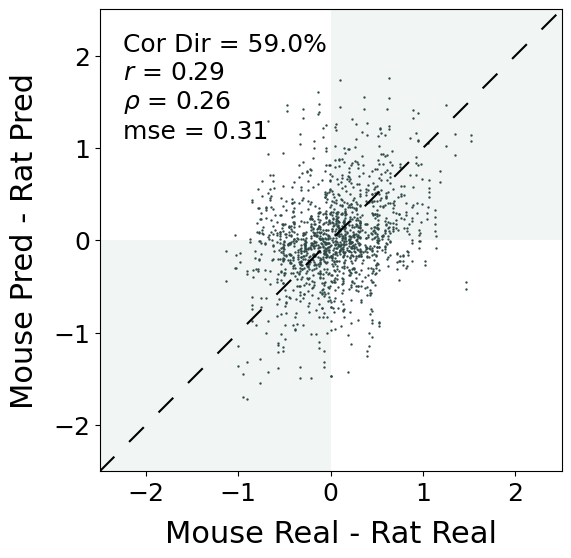

cow
bdbi7l3n
# of same sign for true difference and predicted difference: 0.5792880258899676 %
Pearson correlation coefficient: 0.2015, p-value: 4.4e-07
Spearman correlation coefficient: 0.2284, p-value: 9.292e-09
0.08966141165822694


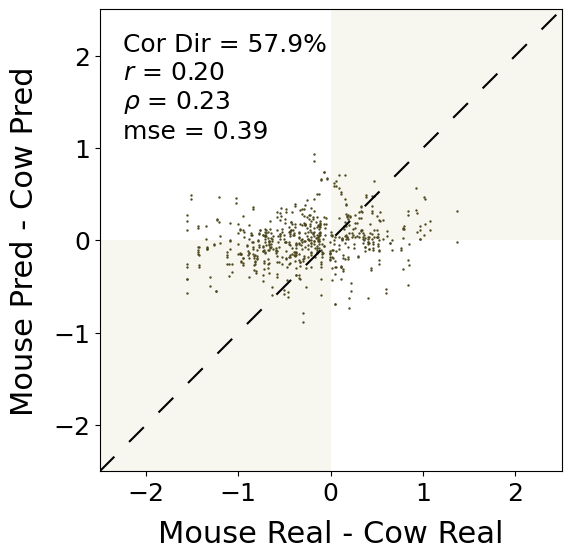

kf8188qf
# of same sign for true difference and predicted difference: 0.5889967637540453 %
Pearson correlation coefficient: 0.3402, p-value: 3.319e-18
Spearman correlation coefficient: 0.3543, p-value: 1.023e-19
0.40933740752996944


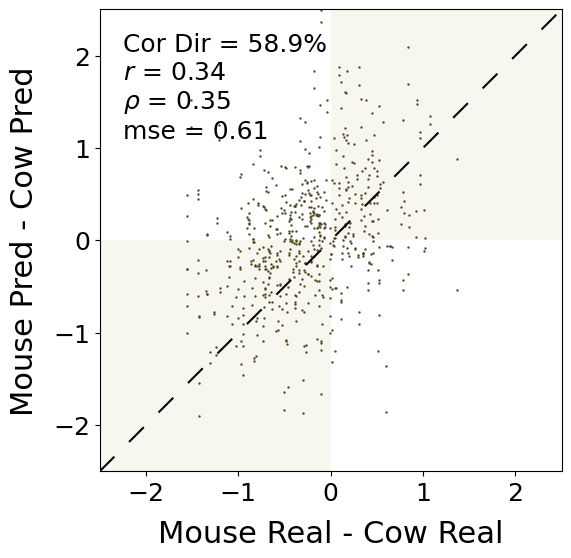

cq45eb2s
# of same sign for true difference and predicted difference: 0.5906148867313916 %
Pearson correlation coefficient: 0.3089, p-value: 3.954e-15
Spearman correlation coefficient: 0.3295, p-value: 4.081e-17
0.32089703302227046


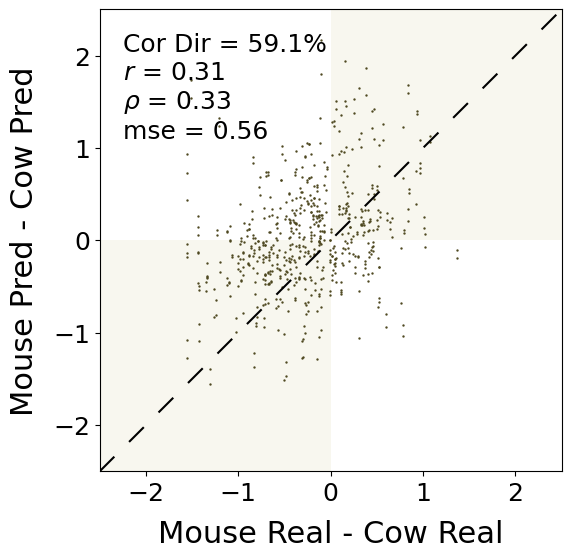

pig
bdbi7l3n
# of same sign for true difference and predicted difference: 0.5238970588235294 %
Pearson correlation coefficient: 0.2493, p-value: 3.776e-09
Spearman correlation coefficient: 0.1952, p-value: 4.491e-06
0.1352246742594683


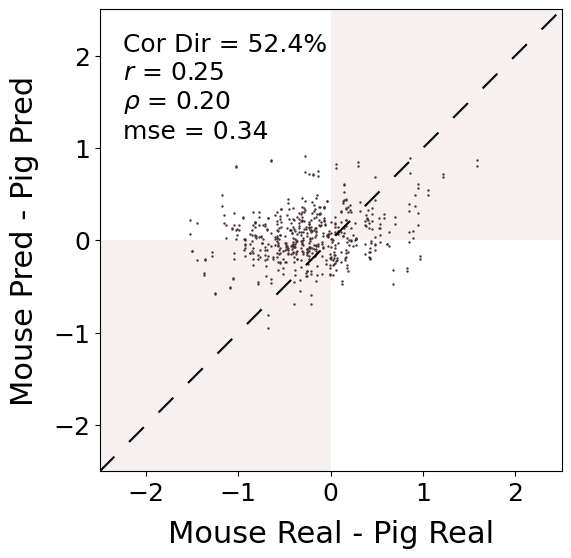

kf8188qf
# of same sign for true difference and predicted difference: 0.49080882352941174 %
Pearson correlation coefficient: 0.1556, p-value: 0.00027
Spearman correlation coefficient: 0.1235, p-value: 0.003902
0.2125937183416737


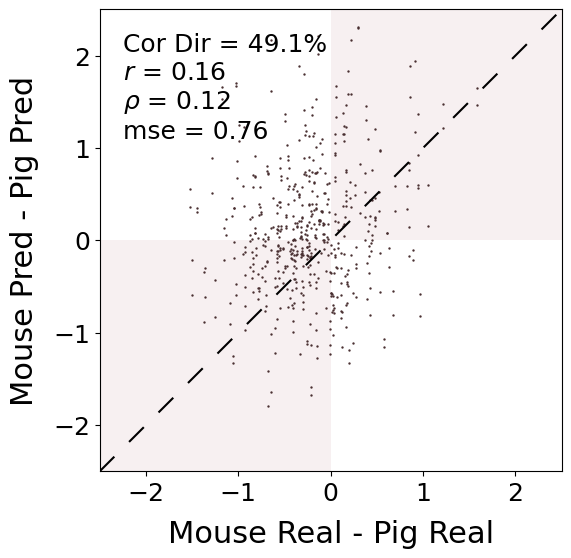

cq45eb2s
# of same sign for true difference and predicted difference: 0.5367647058823529 %
Pearson correlation coefficient: 0.2193, p-value: 2.397e-07
Spearman correlation coefficient: 0.1802, p-value: 2.353e-05
0.26727216586829045


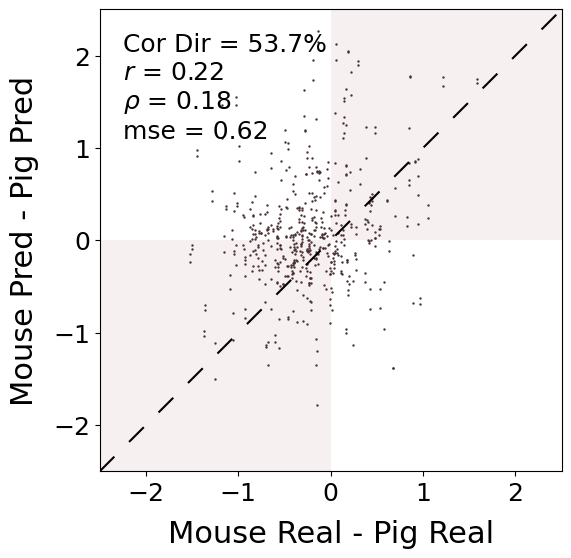

In [23]:
# FOLDCHANGE
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")
    return pearson_corr, pearson_p_value, spearman_corr, spearman_p_value
    
direc = 'foldchange_9_25/'

# species = 'macaque'
# model = 'bdbi7l3n'

species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['macaque']

model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
# model_list = ['bdbi7l3n']

mouse_real_neg=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', sep="\t", header=None)
mouse_real_pos=pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', sep="\t", header=None)

real_neg_len = 2*len(mouse_real_neg)
real_pos_len = 2*len(mouse_real_pos)

for species in species_list:
    print(species)
    mac_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', sep="\t", header=None)
    mouse_qn = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed', sep="\t", header=None)
    one_to_one_peaks = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/oneToOnePeaks/{species}_mouse.bed', header=None, sep='\t')
    
    peaks = one_to_one_peaks[[4, 14]]

    merged_df = peaks.merge(mac_qn, how='left', left_on=4, right_on=3, suffixes=('', '_mac'))
    merged_df = merged_df.merge(mouse_qn, how='left', left_on=14, right_on=3, suffixes=('_MAC', '_mouse'))
    
    for model in model_list:
        print(model)

        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, sep="\t").rename(columns={0: 'mac_chr'})
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)

        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len].reset_index(drop=True)
        
        doubled_combined = pd.concat([doubled_val2_df, pred_val2_df], axis=1)
        
        mac_val2_real_pred = doubled_combined.rename(columns={4: 'mac_true', 0:'mac_pred'})
        
        merged_mac_real_pred = peaks.merge(mac_val2_real_pred, how='left', left_on=4, right_on=3).drop(14, axis=1)
        m_mac_pred = merged_mac_real_pred.rename(columns={3:'mac_peak'}).drop(4, axis=1)




        mouse_pred = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_mouse_TEST.csv', sep="\t", header=None)


        mouse_pred_pos = mouse_pred.head(real_pos_len).reset_index(drop=True)
        
        doubled_mouse_real_pos = pd.concat([mouse_real_pos, mouse_real_pos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        
        doubled_mouse_real_pos = doubled_mouse_real_pos.rename(columns={0:'mouse_chr'})
        mouse_pos_real_pred = pd.concat([doubled_mouse_real_pos.drop(columns=5), mouse_pred_pos], axis=1)
        mouse_pos_real_pred = mouse_pos_real_pred.rename(columns={4:'mouse_true', 0:'mouse_pred'}).reset_index(drop=True)
        
        
        merged_mouse_pred = peaks.merge(mouse_pos_real_pred, how='left', left_on=14, right_on=3)
        
        m_mouse_pred = merged_mouse_pred.rename(columns={3:'mouse_peak'}).drop([14], axis=1)

####################### make bigboss mouse + query predicted and real info

        bigboss = pd.concat([m_mouse_pred, m_mac_pred], axis=1)
        
        bigboss['true'] = bigboss['mouse_true']-bigboss['mac_true']
        bigboss['pred'] = bigboss['mouse_pred']-bigboss['mac_pred']
        
        mouse_av = (bigboss.loc[::2, 'mouse_pred'].values + bigboss.loc[1::2, 'mouse_pred'].values) / 2
        mac_av = (bigboss.loc[::2, 'mac_pred'].values + bigboss.loc[1::2, 'mac_pred'].values) / 2
        
        # Add the averages back to the DataFrame as a new column
        bigboss.loc[::2, 'mouse_pred_avg'] = mouse_av  # Assign averages to even indices only
        bigboss.loc[::2, 'mac_pred_avg'] = mac_av 
        bigboss['avg_pred'] = bigboss['mouse_pred_avg']-bigboss['mac_pred_avg']
        
        
        same_sign = np.sign(bigboss['true']) == np.sign(bigboss['pred'])
        same_sign_percentage = same_sign.sum() / len(bigboss)
        print(f'# of same sign for true difference and predicted difference: {same_sign_percentage} %')
        
        # same_sign = np.sign(bigboss.loc[::2]['true']) == np.sign(bigboss.loc[::2]['avg_pred'])
        # print(f'# of same sign for true difference and averaged predicted difference: {same_sign.sum()} / {len(bigboss) / 2} = {same_sign.sum() / (len(bigboss) / 2)}%')
        
        x = bigboss['true']
        y = bigboss['pred']
        
        mse = mean_squared_error(x, y)
        
        r, rP, rho, rhoP = pearson_spearman(x, y)
        xlim = (-2.5, 2.5)
        ylim = (-2.5, 2.5)
        
        fig, ax = plt.subplots(figsize=(6,6))
        
        # Shade quadrant I (x > 0 and y > 0)
        ax.add_patch(Rectangle((0, 0), xlim[1], ylim[1],
                               facecolor=darks[species.capitalize()], alpha=0.1))
        
        # Shade quadrant III (x < 0 and y < 0)
        ax.add_patch(Rectangle((xlim[0], ylim[0]), abs(xlim[0]), abs(ylim[0]),
                               facecolor=darks[species.capitalize()], alpha=0.1))
        
        # Set limits and aspect ratio
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_aspect('equal')

        textstr = f'Cor Dir = {same_sign_percentage*100:.1f}%\n$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}\nmse = {mse:.2f}'
        plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=18, verticalalignment='top')

        
        plt.scatter(x, y, color=super_darks[species.capitalize()], marker='.', s=2)
        x = bigboss['true'].squeeze().values.reshape(-1, 1)
        y = bigboss['pred'].squeeze().values

        reg = LinearRegression().fit(x, y)
        slope = reg.coef_[0]
        intercept = reg.intercept_
        reg_line = reg.predict(x)
        # plt.plot(x, reg_line, color=super_darks[species.capitalize()], linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')
        print(slope)
        plt.plot([-2.5, 2.5], [-2.5, 2.5], color='black', linestyle='--', label='y = x', dashes=(10, 10))
        plt.xlabel(f'Mouse Real - {species.capitalize()} Real', labelpad=10, fontsize=22)
        plt.ylabel(f'Mouse Pred - {species.capitalize()} Pred', labelpad=10, fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        # plt.title(f'Foldchange diff in real vs. predicted for model: {model}')
        plt.savefig(f"{thesis_dir}{direc}{species}_{model}.tif", dpi=300, bbox_inches='tight')
        plt.show()

Cow Prediction Accuracy for EQN (bdbi7l3n)
1.3532293117756025


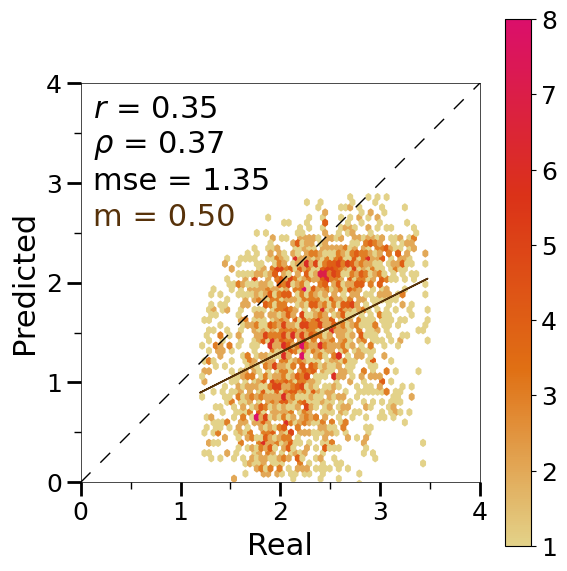

Cow Prediction Accuracy for QN (bdbi7l3n)
1.3858657275407156


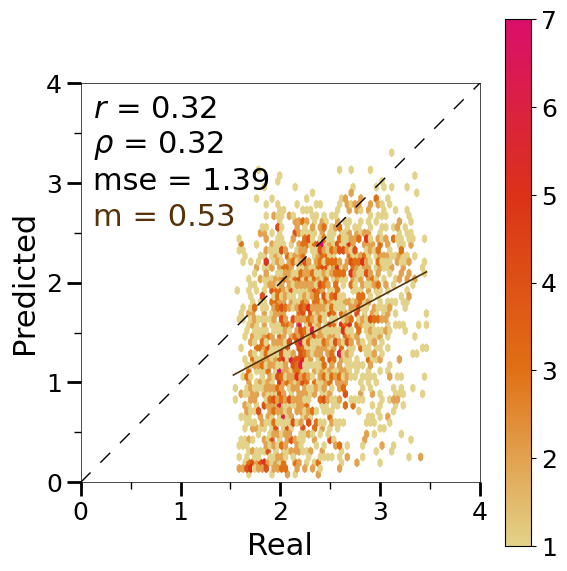

Cow Prediction Accuracy for log (bdbi7l3n)
2.4241740525743967


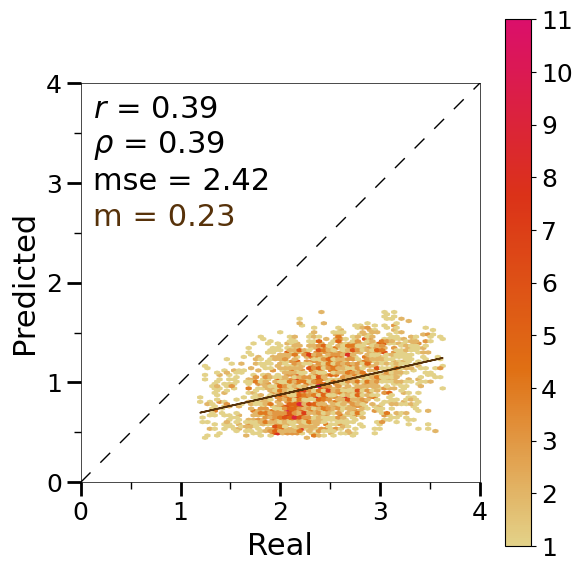

In [11]:
# test log scatter
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap, to_rgb

direc='test_scatter_narrow/'

def format_pval(p):
    return "0.0" if p == 0 else f"{p:.2e}"
    
def mean_squared_error(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    return np.mean((x - y) ** 2)

def format_value(metric_name, value):
    """Format values depending on whether it's a P-value metric or not."""
    # Check for '_p' which is more general for 'pearson_p', 'spearman_p' etc.
    if "_p" in metric_name:
        return f"{value:.2e}"  # Scientific notation for p-values
    else:
        return f"{value:.3g}"  # General format for other metrics
    
def make_smooth_colormap(name, colors_hex, n_points=256):
    colors_rgb = [to_rgb(c) for c in colors_hex]
    return LinearSegmentedColormap.from_list(name, colors_rgb, N=n_points)
    
def make_triple_colormap(base_hex, name):
    if name == 'Cow_triple':
        return make_smooth_colormap('Cow_contrast', [lights['Cow'], '#e07014', '#db3218', '#db0f6b'])
    elif name == 'Mouse_triple':
        return make_smooth_colormap('Mouse_contrast', [lights['Mouse'], '#4E3987', '#0055C2', '#09C3E8'])
    elif name == 'Pig_triple':
        return make_smooth_colormap('Pig_contrast', [lights['Pig'], '#9E494C', '#A61FA1', '#5613A8'])
    elif name == 'Macaque_triple':
        return make_smooth_colormap('Macaque_contrast', [lights['Macaque'], '#348394', '#1CC7B5', '#08C747'])
    elif name == 'Rat_triple':
        return make_smooth_colormap('Rat_contrast', [lights['Rat'], '#3F7028', '#D6C215', '#FF9E17'])
    else:
        return make_smooth_colormap(name + '_contrast', ['#ffffcc', base_hex, '#3b528b'])

triple_cmaps = {name: make_triple_colormap(hex_color, name + '_triple')
                for name, hex_color in colors.items()}

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rP, rho, rhoP, mse, species):
    print(title)
    print(mse)
    x = true_df.squeeze()
    y = pred_df.squeeze()

    gridsize=50
    
    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='black', linestyle='--', linewidth=1, dashes=(10, 10))

    custom_cmap = triple_cmaps[species.capitalize()]
        
    hb = plt.hexbin(x, y, gridsize=gridsize, cmap=custom_cmap, mincnt=1)  # higher gridsize = finer bins
    cb = plt.colorbar(hb)

    # Set colorbar ticks to integers only
    cb.locator = ticker.MaxNLocator(integer=True)
    cb.update_ticks()

    cb.ax.tick_params(labelsize=18)

    plt.xlabel(f'{xlabel}', fontsize=22, labelpad=5)
    plt.ylabel(f'{ylabel}', fontsize=22, labelpad=5)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    x = true_df.squeeze().values.reshape(-1, 1)
    y = pred_df.squeeze().values

    # Fit linear regression
    reg = LinearRegression().fit(x, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    reg_line = reg.predict(x)
    
    plt.plot(x, reg_line, color='#57320A', linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}\nmse = {mse:.2f}'
    plt.text(0.03, 0.97, textstr, transform=plt.gca().transAxes,
             fontsize=22, verticalalignment='top')
    textstr = f'm = {slope:.2f}'
    plt.text(0.03, 0.7, textstr, transform=plt.gca().transAxes,
             fontsize=22, verticalalignment='top', color='#57320A')

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.tick_params(width=0.5, length=4)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    
    # --- Add these lines to change tick length ---
    # Customize major ticks
    ax.tick_params(which='major', length=10, width=2)
    # Customize minor ticks
    ax.tick_params(which='minor', length=5, width=1)

    plt.tight_layout()

    # plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}_density_{str(gridsize)}.tif", dpi=300, bbox_inches='tight')
    plt.show()
    # plt.close()
    return slope
    
table = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables_mse/135log_model_eval_table_FINAL_mse.tsv', sep='\t')
mouseTable = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/figs/tables_mse/mouse_135log_model_eval_table_FINAL_mse.tsv', sep='\t')
    
results_corr = []
# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['cow']
# model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
model_list = ['bdbi7l3n']
for species in species_list:
    # print(f'\n{species}')
    for model in model_list:

        ### EQN MODEL
        pred_TEST_ortho = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/mcf297qb_FINAL/activations_{species}_TEST_orthologs.csv', header=None)
        
        testPos = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits_eqn/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        testNeg = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        testPos_len = 2*len(testPos)
        testNeg_len = 2*len(testNeg)
        
        if len(pred_TEST_ortho) != testPos_len+testNeg_len:
            print(f"ERROR TEST ORTHO ({species}, {model}): predictions are a different length than validation sets")
        
        doubled_test2_df = pd.concat([testPos, testPos]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_testNeg = pd.concat([testNeg, testNeg]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test2_df = pred_TEST_ortho.head(testPos_len)
        pred_testNeg = pred_TEST_ortho.tail(testNeg_len)

        ### QN Model
        pred_TEST_ortho = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/bazc1enn_FINAL/activations_{species}_TEST_orthologs.csv', header=None)
        
        testPos = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits_qn/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        testNeg = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        testPos_len = 2*len(testPos)
        testNeg_len = 2*len(testNeg)
        
        if len(pred_TEST_ortho) != testPos_len+testNeg_len:
            print(f"ERROR TEST ORTHO ({species}, {model}): predictions are a different length than validation sets")
        
        doubled_test3_df = pd.concat([testPos, testPos]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test3_df = pred_TEST_ortho.head(testPos_len)

        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_FINAL/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        test2R, test2RP, test2Rho, test2RhoP = corr(doubled_test2_df, pred_test2_df)
        
        test3R, test3RP, test3Rho, test3RhoP = corr(doubled_test3_df, pred_test3_df)
        
        orthoR, orthoRP, orthoRho, orthoRhoP = corr(doubled_pos_df, pred_pos_df)

        test2Mse = mean_squared_error(pred_test2_df, doubled_test2_df)
        test3Mse = mean_squared_error(pred_test3_df, doubled_test3_df)
        orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)

        slope2 = scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for EQN ({model})', 'Real', 'Predicted', test2R, test2RP, test2Rho, test2RhoP, test2Mse, species)
        slope3 = scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for QN ({model})', 'Real', 'Predicted', test3R, test3RP, test3Rho, test3RhoP, test3Mse, species)
        slopeOrtho = scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for log ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho, orthoRhoP, orthoMse, species)       
        
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test2',
            'pearson_r': locate(table, species, 'Test2', 'Pearson', model),
            'pearson_p': locate(table, species, 'Test2', 'Pearson_p', model),
            'spearman_rho': locate(table, species, 'Test2', 'Spearman', model),
            'spearman_p': locate(table, species, 'Test2', 'Spearman_p', model),
            'mse': locate(table, species, 'Test2', 'MSE', model),
            'slope': slope2
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test3',
            'pearson_r': locate(table, species, 'Test3', 'Pearson', model),
            'pearson_p': locate(table, species, 'Test3', 'Pearson_p', model),
            'spearman_rho': locate(table, species, 'Test3', 'Spearman', model),
            'spearman_p': locate(table, species, 'Test3', 'Spearman_p', model),
            'mse': locate(table, species, 'Test3', 'MSE', model),
            'slope': slope3
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'orthologs',
            'pearson_r': locate(table, species, 'Test', 'Pearson', model),
            'pearson_p': locate(table, species, 'Test', 'Pearson_p', model),
            'spearman_rho': locate(table, species, 'Test', 'Spearman', model),
            'spearman_p': locate(table, species, 'Test', 'Spearman_p', model),
            'mse': locate(table, species, 'Test', 'MSE', model),
            'slope': slopeOrtho
        })


results_corr_df = pd.DataFrame(results_corr)

df = results_corr_df
id_vars = ['species', 'model', 'set']
metric_vars = ['pearson_r', 'pearson_p', 'spearman_rho', 'spearman_p', 'mse', 'slope']

df_long = df.melt(
    id_vars=id_vars,
    value_vars=metric_vars,
    var_name='metric',
    value_name='value'
)

# 3. Pivot the long DataFrame to get models as columns
# The index levels will be species, set, and then the metric name
final_df = df_long.pivot_table(
    index=['species', 'set', 'metric'],
    columns='model',
    values='value'
)

# Optional: To ensure the metrics are in the original order,
# you can set the 'metric' column as a categorical type.
final_df = final_df.reindex(metric_vars, level='metric')
final_df_display = final_df.copy()

def format_value(metric_name, value):
    """Format values depending on whether it's a P-value metric or not."""
    # Check for '_p' which is more general for 'pearson_p', 'spearman_p' etc.
    if "_p" in metric_name:
        return f"{value:.2e}"  # Scientific notation for p-values
    else:
        return f"{value:.3g}"  # General format for other metrics

# Loop through each model's column to apply the formatting
for col in final_df_display.columns:
    final_df_display[col] = final_df_display.apply(
        # Access the 'metric' from the index using row.name[2]
        # (assuming it's the 3rd level of your index)
        lambda row: format_value(row.name[2], row[col]),
        axis=1
    )

# Display the formatted table
# final_df_display


In [ ]:
# QN MODEL
import pandas as pd
import scipy.stats
mhc = 200
def correlate():
    rows = []
    # Lists for correlation calculations
    groups = ['Test','Test2', 'Test3', 'Test Cow+Pig']
    preds = [pred_testPos, pred_test2_df, pred_test3_df, pred_test4_df]
    trues = [doubled_testPos, doubled_test2_df, doubled_test3_df, doubled_test4_df]

    # Calculate correlations
    for group, pred_df, true_df in zip(groups, preds, trues):
        x = true_df.squeeze()
        y = pred_df.squeeze()
        pearson, pearson_p = scipy.stats.pearsonr(x, y)
        spearman, spearman_p = scipy.stats.spearmanr(x, y)
        mse = mean_squared_error(x, y)
        pearson_p *= mhc
        spearman_p *= mhc
        rows.append({'Group': group, 'Metric': 'Pearson', 'Value': pearson})
        rows.append({'Group': group, 'Metric': 'Pearson_p', 'Value': pearson_p})
        rows.append({'Group': group, 'Metric': 'Spearman', 'Value': spearman})
        rows.append({'Group': group, 'Metric': 'Spearman_p', 'Value': spearman_p})
        rows.append({'Group': group, 'Metric': 'MSE', 'Value': mse})
    return pd.DataFrame(rows)

def negatives():
    rows = []
     # Lists for negative average calculations
    negGroup = ['Test neg', 'Test1 avg pred', 'Test Cow+Pig Pred']
    negValues = [pred_testNeg.mean().iloc[0], pred_test1_df.mean().iloc[0], pred_test5_df.mean().iloc[0]]
    
    # Add negative value averages
    for group, negv in zip(negGroup, negValues):
        rows.append({'Group': group, 'Metric': 'Avg Neg Prediction', 'Value': negv})

    return pd.DataFrame(rows)

# --- Main Script ---
all_results = []
neg_results = []
species_list = ['macaque', 'rat', 'cow', 'pig']
model_list = ['bazc1enn']

for species in species_list:
    for model in model_list:
        model_dir = f'{model}_FINAL'
        #############################################################################

        # load TEST ORTHO DFs
        pred_TEST_ortho = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model_dir}/activations_{species}_TEST_orthologs.csv', header=None)
        
        testPos = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits_qn/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        testNeg = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        testPos_len = 2*len(testPos)
        testNeg_len = 2*len(testNeg)
        
        if len(pred_TEST_ortho) != testPos_len+testNeg_len:
            print(f"ERROR TEST ORTHO ({species}, {model}): predictions are a different length than validation sets")
        
        doubled_testPos = pd.concat([testPos, testPos]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_testNeg = pd.concat([testNeg, testNeg]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_testPos = pred_TEST_ortho.head(testPos_len)
        pred_testNeg = pred_TEST_ortho.tail(testNeg_len)


        #############################################################################
        # load TEST DFs
        pred_TEST = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model_dir}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits_qn/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits_qn/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        if len(pred_TEST) != test1_len+test2_len+test3_len:
            print(f"ERROR TEST ({species}, {model}): predictions are a different length than validation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_TEST.head(test1_len)
        pred_test2_df = pred_TEST.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_TEST.tail(test3_len)
        
        #############################################################################
        # load cow pig DFs
        pred_cow_pig_TEST = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model_dir}/activations_cow_pig_TEST.csv', header=None)
        
        test4Pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits_qn/log_test4/cow_pig_liver_pos_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test5Neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test5/cow_pig_liver_neg_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test4_len = 2*len(test4Pos_df)
        test5_len = 2*len(test5Neg_df)
        
        if len(pred_cow_pig_TEST) != test4_len+test5_len:
            print(f"ERROR TEST ({species}, {model}): predictions are a different length than validation sets")
        
        doubled_test4_df = pd.concat([test4Pos_df, test4Pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test5_df = pd.concat([test5Neg_df, test5Neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test4_df = pred_cow_pig_TEST.head(test4_len)
        pred_test5_df = pred_cow_pig_TEST.tail(test5_len)

        
        # Call the correlate function which now uses the globally available DFs
        corr_df = correlate()
        corr_df['species'] = species
        corr_df['model'] = model
        all_results.append(corr_df)

        neg_df = negatives()
        neg_df['species'] = species
        neg_df['model'] = model
        neg_results.append(neg_df)

# #############################################################################
# FINAL PROCESSING
# #############################################################################

summary_df = pd.concat(all_results)

summary_neg_df = pd.concat(neg_results)

# Define the custom order to place negative groups at the bottom.
custom_group_order = [
    'Test', 'Test2', 'Test3','Test Cow+Pig'
]

custom_group_order_neg = [
    'Test neg', 'Test1 avg pred','Test Cow+Pig Pred'
]

# Convert 'group' to a categorical type with the specified order.
summary_df['Group'] = pd.Categorical(summary_df['Group'], categories=custom_group_order, ordered=True)
summary_neg_df['Group'] = pd.Categorical(summary_neg_df['Group'], categories=custom_group_order_neg, ordered=True)


# Pivot so each model is a column
pivot_df = summary_df.pivot_table(
    index=['species', 'Group', 'Metric'],
    columns='model',
    values='Value'
)

pivot_neg_df = summary_neg_df.pivot_table(
    index=['species', 'Group', 'Metric'],
    columns='model',
    values='Value'
)

# Sort the index to maintain a logical order (will now use the custom group order)
pivot_df = pivot_df.sort_index(level=['species', 'Group', 'Metric'])
pivot_neg_df = pivot_neg_df.sort_index(level=['species', 'Group', 'Metric'])

pivot_df_qn = pivot_df[model_list]
pivot_neg_df_qn = pivot_neg_df[model_list]

metric_vars = ['Pearson', 'Pearson_p', 'Spearman', 'Spearman_p', 'MSE']
# pivot_df_qn = pivot_df_qn.reindex(metric_vars, level='Metric')

# Loop through each model's column to apply the formatting
for col in pivot_df_qn.columns:
    pivot_df_qn[col] = pivot_df_qn.apply(
        # Access the 'metric' from the index using row.name[2]
        # (assuming it's the 3rd level of your index)
        lambda row: format_value(row.name[2], row[col]),
        axis=1)

display(pivot_neg_df_qn)
# output_filename = '/home/azstephe/liverRegression/regression_liver/data/figs/tables/qn_log_model_eval_table_FINAL_mse.tsv'
# pivot_df_eqn.to_csv(output_filename, sep='\t')
output_neg_filename = '/home/azstephe/liverRegression/regression_liver/data/figs/tables/qn_log_model_neg_table_FINAL.tsv'
pivot_neg_df_qn.to_csv(output_neg_filename, sep='\t', float_format='%.3f')
# print(f'Results successfully saved to: {output_filename}')